In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('tmp.csv',sep = ',')

In [3]:
# checking the shape of the data(row, column)
train_data.shape

(2671, 9)

In [4]:
# checking the head of the data

train_data.head()

,file_name,width,height,depth,object_name,xmin,ymin,xmax,ymax
0,200801095.jpg,800,600,3,plastic_bag,22.0,422.0,210.0,550.0
1,200801097.jpg,800,600,3,plastic_bag,177.0,112.0,409.0,600.0
2,200801099.jpg,320,240,3,bucket,209.0,170.0,320.0,238.0
3,20080110.jpg,320,240,3,box,164.0,140.0,291.0,223.0
4,20080124.jpg,800,600,3,styrofoam,438.0,1.0,800.0,423.0


In [5]:
objkey = train_data['object_name'].value_counts().keys().tolist()
print(objkey)

['bucket', 'bowl', 'plastic_bag', 'tire', 'box', 'bottle', 'styrofoam', 'plate', 'water_tower', 'tub', 'toilet', 'aquarium', 'washing_machine']


In [6]:
transformation_obj = {
    "aquarium":1, "bottle":2, "bowl":3, "box":4, "bucket":5,
    "plastic_bag":6, "plate":7, "styrofoam":8, "tire":9,
    "toilet":10, "tub":11, "washing_machine":12, "water_tower":13
}
train_data['object_name'] = train_data['object_name'].map(transformation_obj)


In [7]:
#checking the NA values
train_data.isna().sum()

file_name       0
width           0
height          0
depth           0
object_name    11
xmin           11
ymin           11
xmax           11
ymax           11
dtype: int64

In [8]:
#checking the Null values in the dataset
train_data.isnull().sum()

file_name       0
width           0
height          0
depth           0
object_name    11
xmin           11
ymin           11
xmax           11
ymax           11
dtype: int64

In [9]:
train_data.dropna(inplace=True)
train_data.isna().sum()

file_name      0
width          0
height         0
depth          0
object_name    0
xmin           0
ymin           0
xmax           0
ymax           0
dtype: int64

In [10]:
# checking the head of the data after changing 'object_name' 

train_data.head()

,file_name,width,height,depth,object_name,xmin,ymin,xmax,ymax
0,200801095.jpg,800,600,3,6.0,22.0,422.0,210.0,550.0
1,200801097.jpg,800,600,3,6.0,177.0,112.0,409.0,600.0
2,200801099.jpg,320,240,3,5.0,209.0,170.0,320.0,238.0
3,20080110.jpg,320,240,3,4.0,164.0,140.0,291.0,223.0
4,20080124.jpg,800,600,3,8.0,438.0,1.0,800.0,423.0


In [11]:
train_data['object_name'].value_counts()

5.0     699
3.0     428
6.0     405
9.0     288
4.0     213
2.0     178
8.0     129
7.0     121
13.0    108
11.0     35
10.0     24
1.0      20
12.0     12
Name: object_name, dtype: int64

In [12]:
df_drop = train_data.drop(['file_name', 'object_name', 'depth'], axis=1)
df_drop.head()

,width,height,xmin,ymin,xmax,ymax
0,800,600,22.0,422.0,210.0,550.0
1,800,600,177.0,112.0,409.0,600.0
2,320,240,209.0,170.0,320.0,238.0
3,320,240,164.0,140.0,291.0,223.0
4,800,600,438.0,1.0,800.0,423.0


In [13]:
# Normalization
df_norm = (df_drop - df_drop.mean()) / df_drop.std()
df_norm.head()

,width,height,xmin,ymin,xmax,ymax
0,3.253257,3.015652,-1.145023,3.431430,-0.637868,3.236062
1,3.253257,3.015652,0.182681,-0.129822,1.009272,3.750073
2,-0.982947,-1.042653,0.456787,0.536477,0.272612,0.028634
3,-0.982947,-1.042653,0.071325,0.191839,0.032576,-0.125569
4,3.253257,3.015652,2.418363,-1.404980,4.245613,1.930474


In [14]:
from sklearn.decomposition import PCA

In [15]:
y = train_data['object_name'].values
y

array([6., 6., 5., ..., 5., 9., 5.])

In [16]:
arr = df_norm.values
arr

array([[ 3.25325724,  3.01565202, -1.14502297,  3.43142993, -0.63786777,
         3.23606205],
       [ 3.25325724,  3.01565202,  0.18268084, -0.12982201,  1.00927247,
         3.75007298],
       [-0.9829466 , -1.04265297,  0.45678743,  0.53647674,  0.27261176,
         0.02863389],
       ...,
       [-0.27691263, -0.36626881, -0.21134739, -0.55487467, -0.14124257,
         0.11087563],
       [-0.27691263, -0.36626881, -0.46832232, -0.99141523,  0.09051585,
        -0.05360786],
       [-0.27691263, -0.36626881, -0.07429409, -0.11833411, -0.23229052,
        -0.05360786]])

In [17]:
pca = PCA(n_components=2)
arr_pca = pca.fit(arr).transform(arr)
arr_pca

array([[ 4.93170442,  4.26127999],
       [ 4.97755705,  1.31067335],
       [-0.54839598, -0.31128333],
       ...,
       [-0.57794128, -0.04314156],
       [-0.78702385, -0.26990038],
       [-0.48741307,  0.04142124]])

No handles with labels found to put in legend.


Text(0.5, 1.0, 'PCA of the dataset')

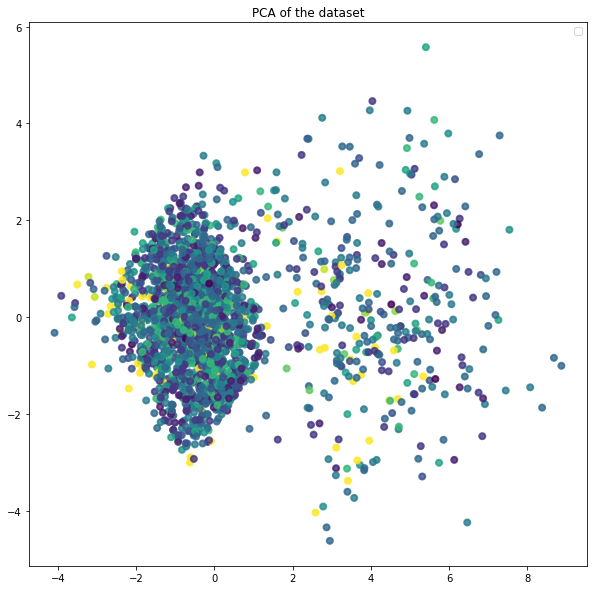

In [18]:
labels = ["aquarium", "bottle", "bowl", "box", "bucket",
          "plastic_bag", "plate", "styrofoam", "tire",
          "toilet", "tub", "washing_machine", "water_tower"]

plt.figure(figsize=(10, 10))
plt.scatter(arr_pca[:, 0], arr_pca[:, 1], c=train_data['object_name'], alpha=.8, lw=2)
plt.legend()
plt.title('PCA of the dataset')

Text(0.5, 1.0, 'PCA of the dataset')

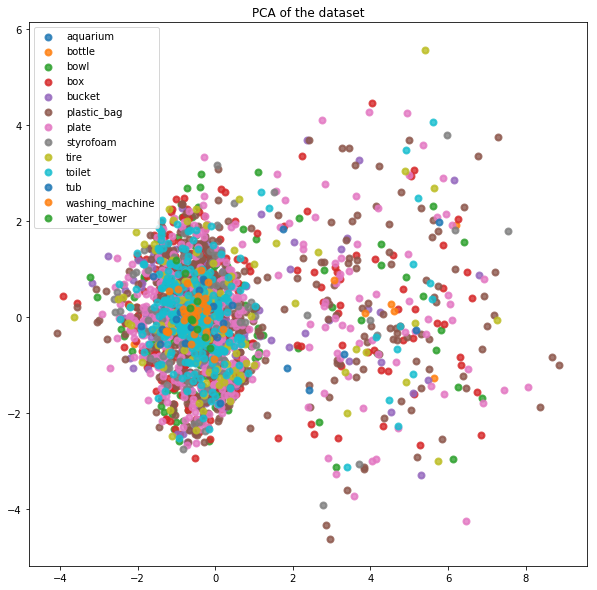

In [19]:
labels = ["aquarium", "bottle", "bowl", "box", "bucket",
          "plastic_bag", "plate", "styrofoam", "tire",
          "toilet", "tub", "washing_machine", "water_tower"]
colors = ['navy', 'turquoise', 'darkorange', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'coral', 'olive', 'teal']


plt.figure(figsize=(10, 10))
for color, i, la in zip(colors, range(13), labels):
    plt.scatter(arr_pca[y == i, 0], arr_pca[y == i, 1], alpha=.8, lw=2,
                label=la)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of the dataset')

In [20]:
group = train_data.groupby('object_name')


In [21]:
group.size()

object_name
1.0      20
2.0     178
3.0     428
4.0     213
5.0     699
6.0     405
7.0     121
8.0     129
9.0     288
10.0     24
11.0     35
12.0     12
13.0    108
dtype: int64

In [22]:
group.get_group(1.0).mean()

width          454.40
height         340.40
depth            3.00
object_name      1.00
xmin           104.45
ymin            85.95
xmax           348.25
ymax           295.95
dtype: float64